# Ejemplo de Notebook
Este notebook contiene la solución de uno de los ejercicios usando el método de Euler.

In [3]:
import numpy as np
import pandas as pd
import math
from typing import Callable

# Soluciones exactas de las ecuaciones diferenciales
def solucion_exacta_1(t):
    return (t / 5) * np.exp(3 * t) - (1 / 25) * np.exp(3 * t) + (1 / 25) * np.exp(-2 * t)

def solucion_exacta_2(t):
    return t + 1 / (1 - t)

def solucion_exacta_3(t):
    return t * np.log(t) + 2 * t

def solucion_exacta_4(t):
    return (1 / 2) * np.sin(2 * t) - (1 / 3) * np.cos(3 * t) + 4 / 3

# Definición de las funciones derivadas
derivada_1 = lambda t, y: t * math.exp(3 * t) - 2 * y
derivada_2 = lambda t, y: 1 + (t - y)**2
derivada_3 = lambda t, y: 1 + y / t
derivada_4 = lambda t, y: math.cos(2 * t) + math.sin(3 * t)

# Método de Euler para la aproximación numérica de ODEs
def euler_ode(t_inicial: float, t_final: float, funcion: Callable[[float, float], float], y_inicial: float, paso: float) -> tuple[list[float], list[float]]:
    t_actual = t_inicial
    tiempos = [t_actual]
    soluciones = [y_inicial]

    while t_actual < t_final:
        y_actual = soluciones[-1]
        y_actual += paso * funcion(t_actual, y_actual)
        soluciones.append(y_actual)
        t_actual += paso
        tiempos.append(t_actual)

    return soluciones, tiempos

# Parámetros para cada problema específico
configuraciones = [
    (derivada_1, 0, 1, 0, 0.5, solucion_exacta_1),
    (derivada_2, 2, 3, 1, 0.5, solucion_exacta_2),
    (derivada_3, 1, 2, 2, 0.25, solucion_exacta_3),
    (derivada_4, 0, 1, 1, 0.25, solucion_exacta_4)
]

# Resolución de los problemas con Euler y almacenamiento de resultados
for idx, (funcion, t0, tf, y0, h, sol_exacta) in enumerate(configuraciones, 1):
    aproximaciones, tiempos = euler_ode(t_inicial=t0, t_final=tf, funcion=funcion, y_inicial=y0, paso=h)
    soluciones_exactas = [sol_exacta(t) for t in tiempos]
    errores = [abs(aproximaciones[j] - soluciones_exactas[j]) for j in range(len(tiempos))]

    resultados = pd.DataFrame({"tiempo": tiempos, "y_aprox": aproximaciones, "y_exacta": soluciones_exactas, "error": errores})
    nombre_archivo = f"resultados_{idx}.csv"
    resultados.to_csv(nombre_archivo, index=False)

print("Los resultados y errores han sido guardados en archivos CSV.")


Los resultados y errores han sido guardados en archivos CSV.



Euler aplicado a y' = te^{3t} - 2y
   tiempo   y_aprox  y_exacta     error
0     0.0  0.000000  0.000000  0.000000
1     0.5  0.000000  0.283617  0.283617
2     1.0  1.120422  3.219099  2.098677


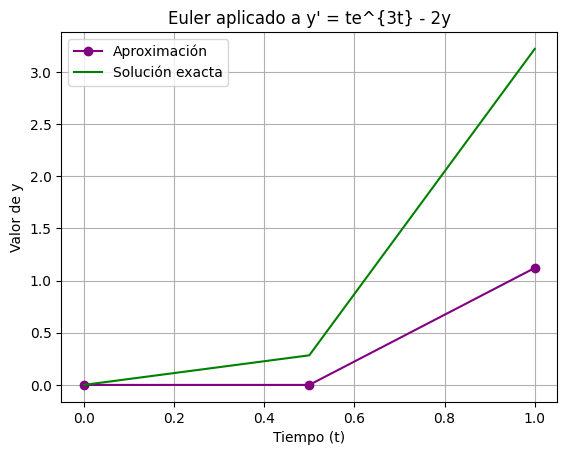


Euler aplicado a y' = 1 + (t - y)^2
   tiempo  y_aprox  y_exacta     error
0     2.0    1.000  1.000000  0.000000
1     2.5    2.000  1.833333  0.166667
2     3.0    2.625  2.500000  0.125000


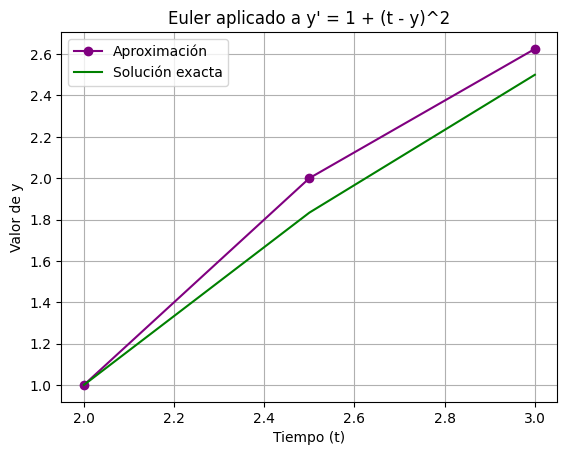


Euler aplicado a y' = 1 + y/t
   tiempo   y_aprox  y_exacta     error
0    1.00  2.000000  2.000000  0.000000
1    1.25  2.750000  2.778929  0.028929
2    1.50  3.550000  3.608198  0.058198
3    1.75  4.391667  4.479328  0.087661
4    2.00  5.269048  5.386294  0.117247


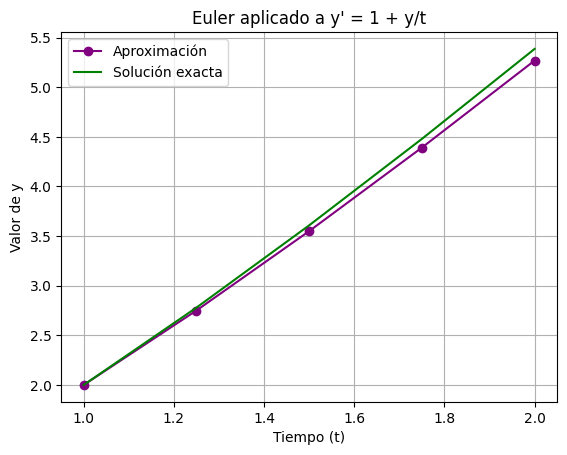


Euler aplicado a y' = cos(2t) + sin(3t)
   tiempo   y_aprox  y_exacta     error
0    0.00  1.000000  1.000000  0.000000
1    0.25  1.250000  1.329150  0.079150
2    0.50  1.639805  1.730490  0.090684
3    0.75  2.024255  2.041472  0.017217
4    1.00  2.236457  2.117980  0.118478


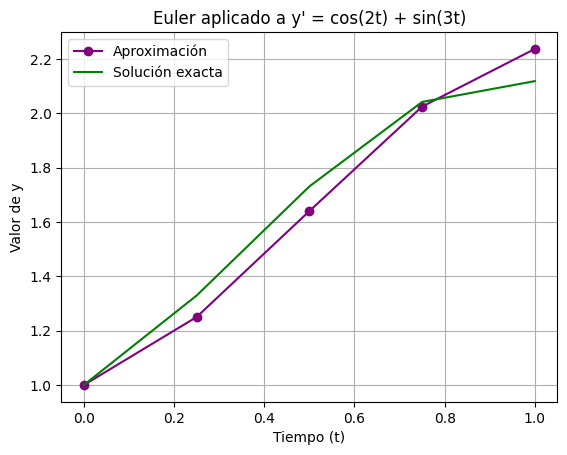

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Archivos CSV que contienen los resultados
archivos = ["resultados_1.csv", "resultados_2.csv", "resultados_3.csv", "resultados_4.csv"]
titulos = [
    "Euler aplicado a y' = te^{3t} - 2y",
    "Euler aplicado a y' = 1 + (t - y)^2",
    "Euler aplicado a y' = 1 + y/t",
    "Euler aplicado a y' = cos(2t) + sin(3t)"
]

# Cargamos y visualizamos los resultados
for archivo, titulo in zip(archivos, titulos):
    df = pd.read_csv(archivo)
    print(f"\n{titulo}")
    print(df)

    # Se grafican las soluciones aproximadas y exactas
    plt.figure()
    plt.plot(df["tiempo"], df["y_aprox"], marker='o', color='purple', label="Aproximación")
    plt.plot(df["tiempo"], df["y_exacta"], color='green', label="Solución exacta")
    plt.xlabel('Tiempo (t)')
    plt.ylabel('Valor de y')
    plt.title(titulo)
    plt.legend()
    plt.grid(True)
    plt.show()
